In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)
    # render plot with "plt.show()".


In [13]:
#Loading In Vivo dataset
vivo_data = pd.read_excel('all_mets_sorted.xlsx')
vivo_data

,Compound,tumor-enzalutamide-1-01___pos,tumor-enzalutamide-1-02___pos,tumor-enzalutamide-2-01___pos,tumor-enzalutamide-2-02___pos,tumor-enzalutamide-3-01___pos,tumor-enzalutamide-3-02___pos,tumor-enzalutamide-4-01___pos,tumor-enzalutamide-4-02___pos,tumor-enzalutamide-5-01___pos,tumor-enzalutamide-5-02___pos,tumor-veh-1-01___pos,tumor-veh-1-02___pos,tumor-veh-2-01___pos,tumor-veh-2-02___pos,tumor-veh-3-01___pos,tumor-veh-3-02___pos
0,3-hydroxy-trimethyllysine,1.312317e+06,6.478023e+05,1.292392e+06,6.980068e+05,1.678840e+05,6.833011e+05,1.711587e+06,7.396879e+05,3.560271e+05,8.255613e+05,2.506504e+05,8.326832e+05,1.549525e+06,1.756605e+06,3.195673e+05,2.668051e+05
1,5'-methylthioadenosine,4.064835e+06,2.976799e+06,5.816087e+06,4.217810e+06,6.170014e+06,3.526259e+06,7.678741e+06,3.810675e+06,5.015011e+06,6.800874e+06,8.649006e+05,1.799790e+06,2.994225e+06,3.486802e+06,3.252875e+06,3.492263e+06
2,6P-gluconate,3.081115e+05,1.178485e+05,3.792533e+05,2.833299e+05,3.484837e+05,1.929868e+05,5.435408e+05,3.004935e+05,3.635159e+05,3.195684e+05,7.285219e+04,8.143707e+04,4.939102e+05,4.600779e+05,2.401798e+05,1.948953e+05
3,Ac-carnitine,6.078859e+08,4.500738e+08,1.131723e+09,6.672981e+08,7.175862e+08,6.538829e+08,1.256164e+09,8.682962e+08,7.396907e+08,9.223001e+08,2.448536e+08,3.615274e+08,6.811912e+08,8.313656e+08,4.469972e+08,3.818224e+08
4,Acetyl-CoA,2.009765e+05,6.273022e+04,1.960151e+05,1.488305e+05,2.612941e+05,1.475865e+05,3.152595e+05,1.846231e+05,1.432948e+05,1.305121e+05,1.678680e+04,3.450880e+04,1.087826e+05,8.789300e+04,1.376190e+05,1.619797e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,UTP,2.102449e+06,3.420387e+05,3.304866e+06,1.716985e+06,2.143604e+06,7.688939e+05,2.832957e+06,8.383112e+05,1.740609e+06,4.722039e+06,1.309510e+05,1.106626e+06,1.696015e+06,2.090909e+06,2.756710e+06,1.109161e+06
140,Val,2.752607e+07,2.240008e+07,4.311822e+07,3.142190e+07,5.000602e+07,4.037038e+07,4.763899e+07,3.186228e+07,2.867984e+07,3.190784e+07,1.481406e+07,1.026255e+07,2.190470e+07,3.485870e+07,2.608689e+07,3.870094e+07
141,XMP,4.008279e+04,7.598428e+04,0.000000e+00,3.517377e+04,1.755210e+04,3.949319e+04,2.201375e+04,6.526242e+04,4.746407e+04,1.125520e+04,3.980335e+04,4.770772e+04,3.422161e+04,6.682701e+04,4.372737e+04,7.377518e+04
142,xylonic acid,2.251497e+06,3.584824e+06,5.374362e+06,4.132938e+06,3.208174e+06,3.814771e+06,7.014158e+06,4.536155e+06,4.543773e+06,6.654401e+06,1.462463e+06,2.724194e+06,4.032492e+06,7.128474e+06,3.625626e+06,4.428424e+06


In [14]:
#Loading In Vitro dataset
vitro_data = pd.read_csv('updated_metabolite_data.csv')
vitro_data

,Unnamed: 0,Name,DMSO1,DMSO2,DMSO3,24_hr_ENZA1,24_hr_ENZA2,24_hr_ENZA3,48_hr_ENZA1,48_hr_ENZA2,48_hr_ENZA3,LT_ENZA1,LT_ENZA2,LT_ENZA3
0,0,13BPG,28.130261,35.227032,40.110666,62.310359,51.354058,31.277899,29.785487,25.047013,39.931565,4.964112,5.617787,3.886668
1,1,2-Aminobutyrate,1132.470608,1076.289667,1194.116794,1626.896112,1386.165787,1425.237157,1434.852383,1583.384587,1438.727838,1909.316970,2077.927386,2270.309552
2,2,2-HG,577.996558,602.532031,656.027625,661.126012,643.201382,713.731346,529.196080,604.615748,535.138142,527.521470,601.638775,707.219137
3,3,2-Methylpropanoyl-CoA,0.927717,0.938439,0.904019,1.712536,1.342578,1.109086,1.421796,1.510007,1.514887,1.769473,1.765015,1.441076
4,4,2-Oxoadipate,10.099795,9.520298,8.887873,29.887215,29.745669,14.856049,15.300953,24.221460,19.511732,24.240513,22.435801,43.367598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,138,Uric Acid,452.323674,276.349639,158.550548,290.671787,306.358507,257.476789,518.906382,386.719446,295.461024,1494.747472,794.753364,516.384075
139,139,UTP,851.871887,826.266436,858.769216,1325.447700,1041.120313,951.545926,1021.920922,1152.321405,1149.273465,744.083198,906.751206,1098.991176
140,140,Val,16686.013570,12135.745740,7579.941049,23306.716840,18238.180940,19689.978010,16542.498310,16211.371870,15418.606220,39902.548060,22787.818290,22792.753010
141,141,Vit-C,62.801582,68.801038,60.949982,44.743824,41.145201,31.282092,33.168856,30.426902,42.723866,46.676851,51.263426,44.607812


In [15]:
#Feature selection based on shared metabolites
vitro_mets = vitro_data.loc[:, 'Name'].values
vivo_mets = vivo_data.loc[:, 'Compound'].values
met_names = []
unique_mets_vivo = []
unique_mets_vitro = []
for i in range(0, len(vivo_mets)):
    if vivo_mets[i] in vitro_mets:
        met_names.append(vivo_mets[i])
    else:
        unique_mets_vivo.append(vivo_mets[i])
for i in range(0, len(vitro_mets)):
    if vitro_mets[i] not in vivo_mets:
        unique_mets_vitro.append(vitro_mets[i])


print("Shared Metabolites:")
print(met_names)
print("Length: " + str(len(met_names)))
print("Metabolites unique to vivo:")
print(unique_mets_vivo)
print("Length: " + str(len(unique_mets_vivo)))
print("Metabolites unique to vitro:")
print(unique_mets_vitro)
print("Length: " + str(len(unique_mets_vitro)))

Shared Metabolites:
['6P-gluconate', 'Ac-carnitine', 'Acetyl-CoA', 'ADP', 'Ala', 'AMP', 'Arg', 'Arg-Succ', 'Asn', 'Asp', 'ATP', 'Carnitine', 'CDP', 'CDP-choline', 'CDP-EtA', 'Choline', 'Cit', 'Citrulline', 'CMP', 'CoA', 'Creatine', 'Creatinine', 'CTP', 'Cys', 'Cystathionine', 'dC', 'DHAP', 'Dihydroorotate', 'dTMP', 'dTTP', 'F16BP', 'Fru', 'Fum', 'G3P', 'GDP', 'Glc', 'Gln', 'Glu', 'Gly', 'Glycerol-3-P', 'GSH', 'GSSG', 'GTP', 'His', 'IMP', 'Inosine', 'Lac', 'Leu/Ile', 'Lys', 'Mal', 'Met', 'NAD+', 'NADH', 'NADP+', 'Nicotinamide', 'Ornithine', 'Orotate', 'Palmitate', 'PO4', 'Pro', 'Pyr', 'Rib', 'SAM', 'Ser', 'Sorbitol', 'Thr', 'Trp', 'Tyr', 'UDP-Glc', 'UDP-GlcNAc', 'UMP', 'Uric Acid', 'UTP', 'Val']
Length: 74
Metabolites unique to vivo:
['3-hydroxy-trimethyllysine', "5'-methylthioadenosine", 'adenylosuccinic acid', 'AICAR', 'AIR', 'alpha-ketoglutarate', 'arachidic acid', 'ascorbate', 'betaine', 'CAIR', 'carbamoyl-aspartate', 'cis-aconitate', 'cysteine-glutathione disulfide ', 'cystine', 'c

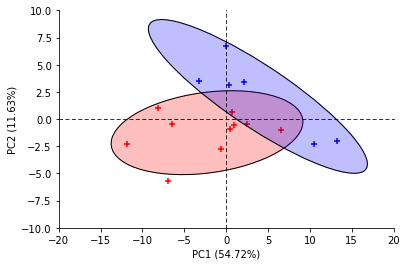

Explained Variance:
[0.54720611 0.11629592]


In [16]:
#Fitting to the In Vivo Dataset
X_data_1_pre = vivo_data
X_data_1_pre = X_data_1_pre.drop_duplicates(subset='Compound')
X_data_1_pre = X_data_1_pre.set_index('Compound')
X_data_1 = X_data_1_pre.loc[met_names, :].values
X_data_1 = np.transpose(X_data_1)
X_data_1_unnormalized = StandardScaler()
X_data_1 = X_data_1_unnormalized.fit_transform(X_data_1)

#Running PCA
components = PCA(n_components = 2)
components.fit(X_data_1)
X = components.transform(X_data_1)

PC1_values = []
PC2_values = []
for i in range(0, len(X)):
    PC1_values.append(X[i][0])
    PC2_values.append(X[i][1])
    
    
#Constructing the PCA Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['right'].set_linestyle((0, (4, 4)))
ax.spines['top'].set_linestyle((0, (4, 4)))
ax.spines['right'].set_position('center')
ax.spines['top'].set_position('center')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
confidence_ellipse(np.array(PC1_values[:10]), np.array(PC2_values[:10]), ax, n_std=2.0, facecolor='r', alpha=0.25, edgecolor='r')
confidence_ellipse(np.array(PC1_values[:10]), np.array(PC2_values[:10]), ax, n_std=2.0, facecolor='None', edgecolor='k')
confidence_ellipse(np.array(PC1_values[10:]), np.array(PC2_values[10:]), ax, n_std=2.0, facecolor='b', alpha=0.25, edgecolor='b')
confidence_ellipse(np.array(PC1_values[10:]), np.array(PC2_values[10:]), ax, n_std=2.0, facecolor='None', edgecolor='k')
plt.scatter(PC1_values[:10], PC2_values[:10], label='In Vivo Enza', marker='+', c='r')
plt.scatter(PC1_values[10:], PC2_values[10:], label='In Vivo Vehicle', marker='+', c='b')
plt.xlim([-20, 20])
plt.ylim([-10, 10])
plt.xlabel('PC1 (' + str(round(components.explained_variance_ratio_[0] * 100, 2)) + '%)')
plt.ylabel('PC2 (' + str(round(components.explained_variance_ratio_[1] * 100, 2)) + '%)')
plt.show()

print("Explained Variance:")
print(components.explained_variance_ratio_)

In [17]:
#Pooling technical replicates
avg_vivo_data = pd.read_excel('all_mets_sorted_avgs.xlsx')
avg_vivo_data

,Compound,enza 1 avg,enza 2 avg,enza 3 avg,enza 4 avg,enza 5 avg,veh 1 avg,veh 2 avg,veh 3 avg
0,3-hydroxy-trimethyllysine,9.800595e+05,9.951994e+05,4.255926e+05,1.225637e+06,5.907942e+05,5.416668e+05,1.653065e+06,2.931862e+05
1,5'-methylthioadenosine,3.520817e+06,5.016949e+06,4.848136e+06,5.744708e+06,5.907942e+06,1.332346e+06,3.240513e+06,3.372569e+06
2,6P-gluconate,2.129800e+05,3.312916e+05,2.707352e+05,4.220172e+05,3.415421e+05,7.714463e+04,4.769940e+05,2.175376e+05
3,Ac-carnitine,5.289798e+08,8.995108e+08,6.857346e+08,1.062230e+09,8.309954e+08,3.031905e+08,7.562784e+08,4.144098e+08
4,Acetyl-CoA,1.318533e+05,1.724228e+05,2.044403e+05,2.499413e+05,1.369035e+05,2.564780e+04,9.833782e+04,1.497993e+05
...,...,...,...,...,...,...,...,...,...
139,UTP,1.222244e+06,2.510925e+06,1.456249e+06,1.835634e+06,3.231324e+06,6.187885e+05,1.893462e+06,1.932935e+06
140,Val,2.496307e+07,3.727006e+07,4.518820e+07,3.975063e+07,3.029384e+07,1.253830e+07,2.838170e+07,3.239392e+07
141,XMP,5.803354e+04,1.758688e+04,2.852264e+04,4.363809e+04,2.935964e+04,4.375553e+04,5.052431e+04,5.875127e+04
142,xylonic acid,2.918160e+06,4.753650e+06,3.511472e+06,5.775157e+06,5.599087e+06,2.093329e+06,5.580483e+06,4.027025e+06


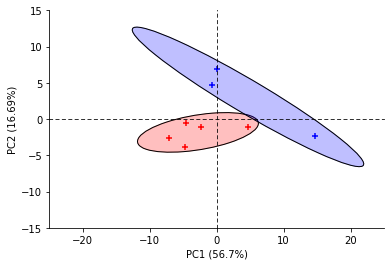

Explained Variance:
[0.56697703 0.16689337]


In [18]:
#Fitting to the In Vivo Dataset
X_data_1_pre = avg_vivo_data
X_data_1_pre = X_data_1_pre.drop_duplicates(subset='Compound')
X_data_1_pre = X_data_1_pre.set_index('Compound')
X_data_1 = X_data_1_pre.loc[met_names, :].values
X_data_1 = np.transpose(X_data_1)
X_data_1_unnormalized = StandardScaler()
X_data_1 = X_data_1_unnormalized.fit_transform(X_data_1)

#Running PCA
components = PCA(n_components = 2)
components.fit(X_data_1)
X = components.transform(X_data_1)

PC1_values = []
PC2_values = []
for i in range(0, len(X)):
    PC1_values.append(X[i][0])
    PC2_values.append(X[i][1])
    
    
#Constructing the PCA Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['right'].set_linestyle((0, (4, 4)))
ax.spines['top'].set_linestyle((0, (4, 4)))
ax.spines['right'].set_position('center')
ax.spines['top'].set_position('center')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
confidence_ellipse(np.array(PC1_values[:5]), np.array(PC2_values[:5]), ax, n_std=2.0, facecolor='r', alpha=0.25, edgecolor='r')
confidence_ellipse(np.array(PC1_values[:5]), np.array(PC2_values[:5]), ax, n_std=2.0, facecolor='None', edgecolor='k')
confidence_ellipse(np.array(PC1_values[5:]), np.array(PC2_values[5:]), ax, n_std=2.0, facecolor='b', alpha=0.25, edgecolor='b')
confidence_ellipse(np.array(PC1_values[5:]), np.array(PC2_values[5:]), ax, n_std=2.0, facecolor='None', edgecolor='k')
plt.scatter(PC1_values[:5], PC2_values[:5], label='In Vivo Enza', marker='+', c='r')
plt.scatter(PC1_values[5:], PC2_values[5:], label='In Vivo Vehicle', marker='+', c='b')
plt.xlim([-25, 25])
plt.ylim([-15, 15])
plt.xlabel('PC1 (' + str(round(components.explained_variance_ratio_[0] * 100, 2)) + '%)')
plt.ylabel('PC2 (' + str(round(components.explained_variance_ratio_[1] * 100, 2)) + '%)')
plt.show()

print("Explained Variance:")
print(components.explained_variance_ratio_)

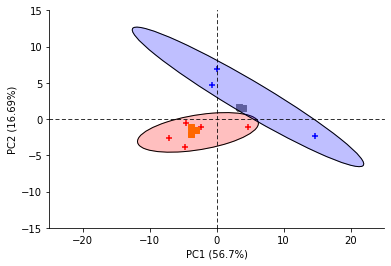

Explained Variance:
[0.56697703 0.16689337]
Coordinates:
[[ 4.69174825 -1.04002979]
 [-2.34736429 -1.08189552]
 [-4.53698537 -0.59934375]
 [-7.10515388 -2.59158727]
 [-4.71267516 -3.8746228 ]
 [14.63914492 -2.34640998]
 [-0.73198088  4.66251304]
 [ 0.10326642  6.87137607]]
[[ 3.42539106  1.56560887]
 [ 3.34092785  1.61664826]
 [ 3.97841001  1.50104985]
 [-3.8527271  -1.12038748]
 [-3.83794287 -2.08828689]
 [-3.05405894 -1.4746326 ]]


In [19]:
#Projecting In Vitro samples into featurespace of In Vivo samples
X_data_pre = vitro_data.drop(['Unnamed: 0', '24_hr_ENZA1', '24_hr_ENZA2', '24_hr_ENZA3', '48_hr_ENZA1', '48_hr_ENZA2', '48_hr_ENZA3'], axis=1)
X_data_pre = X_data_pre.drop_duplicates(subset='Name')
X_data_pre = X_data_pre.set_index('Name')
X_data = X_data_pre.loc[met_names, :].values
X_data = np.transpose(X_data)
X_data[np.isnan(X_data)] = 0
X_data_unnormalized = StandardScaler()
X_data = X_data_unnormalized.fit_transform(X_data)

X_proj = components.transform(X_data)

for i in range(0, len(X_proj)):
    PC1_values.append(X_proj[i][0])
    PC2_values.append(X_proj[i][1])
    
#Constructing the PCA Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['right'].set_linestyle((0, (4, 4)))
ax.spines['top'].set_linestyle((0, (4, 4)))
ax.spines['right'].set_position('center')
ax.spines['top'].set_position('center')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
confidence_ellipse(np.array(PC1_values[:5]), np.array(PC2_values[:5]), ax, n_std=2.0, facecolor='r', alpha=0.25, edgecolor='r')
confidence_ellipse(np.array(PC1_values[:5]), np.array(PC2_values[:5]), ax, n_std=2.0, facecolor='None', edgecolor='k')
confidence_ellipse(np.array(PC1_values[5:8]), np.array(PC2_values[5:8]), ax, n_std=2.0, facecolor='b', alpha=0.25, edgecolor='b')
confidence_ellipse(np.array(PC1_values[5:8]), np.array(PC2_values[5:8]), ax, n_std=2.0, facecolor='None', edgecolor='k')
plt.scatter(PC1_values[:5], PC2_values[:5], label='In Vivo Enza', marker='+', c='r')
plt.scatter(PC1_values[5:8], PC2_values[5:8], label='In Vivo Vehicle', marker='+', c='b')
plt.scatter(PC1_values[8:11], PC2_values[8:11], label='In Vitro Vehicle', marker='s', c='grey')
plt.scatter(PC1_values[11:], PC2_values[11:], label='In Vitro Enza', marker='s', c='darkorange')
plt.xlim([-25, 25])
plt.ylim([-15, 15])
plt.xlabel('PC1 (' + str(round(components.explained_variance_ratio_[0] * 100, 2)) + '%)')
plt.ylabel('PC2 (' + str(round(components.explained_variance_ratio_[1] * 100, 2)) + '%)')
plt.show()

print("Explained Variance:")
print(components.explained_variance_ratio_)

print("Coordinates:")
print(X)
print(X_proj)